In [1]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")

df.head(5)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [15]:
# Easy 1 How many unique customers are there in the dataset? 

print("Unique customers: "+ str(df['customer_id'].nunique()))
print("Top customers:")
df['customer_id'].value_counts()

Unique customers: 5191
Top customers:


50      128
7       121
4       117
80      113
74      112
       ... 
3677      1
4695      1
6468      1
4937      1
4761      1
Name: customer_id, Length: 5191, dtype: int64

In [11]:
# Easy 2 What are the different categories of products available? How many unique categories are there?

print("Number of categories: " + str(df['category'].nunique()))
print()
print("Categories:")
for x in df['category'].unique() :
    print(x)

Number of categories: 8

Categories:
Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir


In [12]:
# Easy 3 Which payment methods are the most popular? How many time was it used?

df['payment_method'].nunique()
methods = (df['payment_method'].unique())

print("Payment methods by popularity (amount of times used)")
df['payment_method'].value_counts()

Payment methods by popularity (amount of times used)


Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [16]:
# Medium 1 What are the three most popular categories, by total sales?

df['category'].value_counts().head(3)

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Name: category, dtype: int64

In [19]:
# Medium 2 What are the total sales attributed to customers over the age of 45?

iv = pd.read_json("dim_customer.json")
df = pd.read_csv("fct_invoice.csv")

iv.rename(columns={"id":"customer_id"})

merged = pd.merge(df,iv,left_on="customer_id",right_on="id")

over_45 = merged.loc[merged['age']>45]
print("Total Sales from people over 45:")
over_45.count()['quantity']

Total Sales from people over 45:


32627

In [20]:
# Medium 2 Total Sales

over_45 = merged.loc[merged['age']>45].index
merged.loc[over_45,'45']='over'
below_45 = merged.loc[merged['age']<=45].index
merged.loc[below_45,'45']='below'

count = merged.groupby('45').size()
percentage = count / len(merged) * 100
print("Total purchases based on age (above or below)")
print(percentage)

Total purchases based on age (above or below)
45
below    26.870909
over     32.805132
dtype: float64


In [ ]:
# Medium 3 How is the data distrbuted across different invoice dates? Are there any seasonal trends or patterns?

#winter spring summer fall
#merged['season'] = ''

merged['month'] = pd.DatetimeIndex(df['invoice_date']).month

winter = merged.loc[(merged['month'] == 12) | ((1 <= merged['month']) & (merged['month'] <= 3))].index
merged.loc[winter,'season']='Winter'

spring = merged.loc[(merged['month'] >= 4) & (merged['month'] <= 6)].index
merged.loc[spring, 'season'] = 'Spring'

summer = merged[(merged['month']<= 9) & (merged['month']>= 7)].index
merged.loc[summer,'season'] = 'Summer'

fall = merged[(merged['month']<= 11) & (merged['month']>= 10)].index
merged.loc[fall,'season'] = 'Fall'

<Axes: >

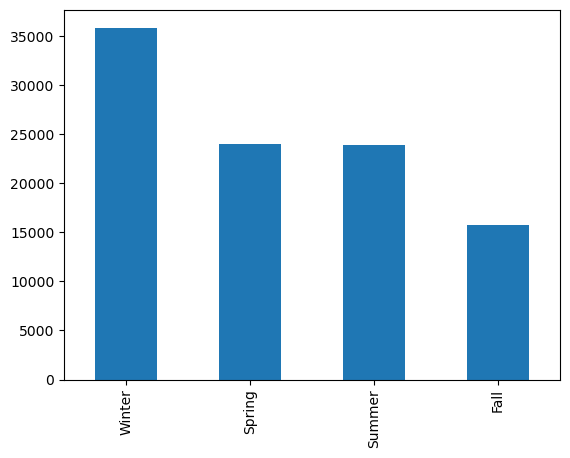

In [25]:
merged['season'].value_counts().plot(kind='bar')

In [27]:
# Hard 1 Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

merged.head(5)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,45,month,season
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson,NaN,5,Spring
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson,NaN,12,Winter
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson,NaN,9,Summer
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson,NaN,5,Spring
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson,NaN,10,Fall


In [28]:
decades = pd.cut(merged['age'],bins=range(10, 101, 10),right=False)
merged.pivot_table(index="category",columns=decades,values="quantity",aggfunc="sum")

age,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
category,,,,,,,,,
Books,229,1427,1518,1542,1364,1420,1019,500,0
Clothing,1727,9392,10247,10220,9343,9700,7055,4095,0
Cosmetics,730,4060,4871,4460,3958,4344,2807,1752,0
Food & Beverage,697,3906,4540,4677,3824,4243,2862,1637,0
Shoes,457,2716,3186,3148,2652,2696,2017,1180,0
Souvenir,281,1304,1496,1514,1286,1307,903,558,0
Technology,274,1359,1590,1553,1162,1457,931,522,0
Toys,480,2859,3217,2983,2626,2797,2078,1201,0
